In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = LinearSVC(C=1.0)

model = svc.fit(features_standardized, target)

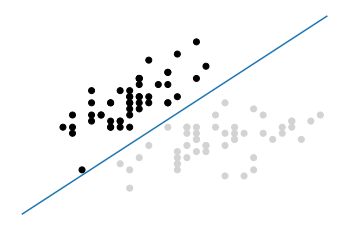

In [2]:
from matplotlib import pyplot as plt

color = ['black' if c==0 else 'lightgrey' for c in target]
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=color)

# create hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

plt.plot(xx, yy)
plt.axis('off'), plt.show();

In [3]:
new_obs = [[-2, 3]]
svc.predict(new_obs)

array([0])

In [5]:
# linearly inseparable classes using kernels
from sklearn.svm import SVC

np.random.seed(0)

features = np.random.randn(200, 2)

# using xor gate to generate linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

svc = SVC(kernel='rbf', random_state=0, gamma=1, C=1)

model = svc.fit(features, target)

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap('red', 'blue')
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker='+', label=cl)


In [11]:
svc_linear = SVC(kernel='rbf', random_state=0, C=1)

svc_linear.fit(features, target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


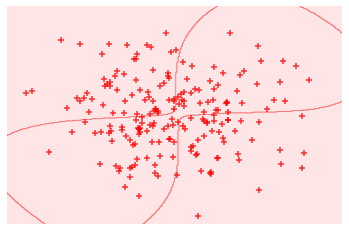

In [12]:
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis('off'), plt.show();

In [15]:
iris = datasets.load_iris()
features, target = iris.data, iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel='linear', probability=True, random_state=0)

model = svc.fit(features_standardized, target)

new_obs = [[.4, .4, .4, .4]]

model.predict_proba(new_obs)

array([[0.00593111, 0.96898012, 0.02508877]])

In [16]:
# IDing support vectors

features = iris.data[:100, :]
target = iris.target[:100]

features_standardized = scaler.fit_transform(features)

svc = SVC(kernel='linear', random_state=0)

model = svc.fit(features_standardized, target)

model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [17]:
model.support_

array([23, 41, 57, 98], dtype=int32)

In [18]:
model.n_support_

array([2, 2], dtype=int32)

In [19]:
# handling imbalanced classes

features, target = iris.data[:100, :], iris.target[:100]

# create imbalanced classes by removing first observations
features, target = features[40:, :], target[40:]

target = np.where((target == 0), 0, 1)

features_standardized = scaler.fit_transform(features)

svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

model = svc.fit(features_standardized, target)